# Decision Trees

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [26]:
df = pd.read_csv('../week_01/all_penguins_clean.csv', index_col=0)
df.dropna(inplace=True)
df.shape

(334, 14)

In [27]:
X = df[['Culmen Length (mm)', 'Culmen Depth (mm)']]
y = df['Species']

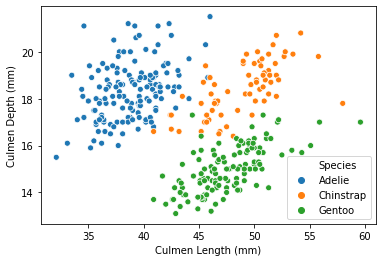

In [28]:
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y)

## Decision Tree from Scratch

In [29]:
predictions = []  # one prediction for every penguin
for i, row in X.iterrows():
    # i: index, row: values of a row as a pd.Series
    if row['Culmen Length (mm)'] < 43:
        if row['Culmen Depth (mm)'] > 15:
            predictions.append('Adelie')
        else:
            predictions.append('Gentoo')
    else:
        if row['Culmen Depth (mm)'] > 17:
            predictions.append('Chinstrap')
        else:
            predictions.append('Gentoo')

In [35]:
from sklearn.metrics import accuracy_score

round(accuracy_score(predictions, y),3)

0.931

## CART Algorithm

* finds out which if statements give the best separation
* it is a **divide-and-conquer** algorithm
* it is a **greedy** algorithm
* as a metric, the GINI purity score

$GINI = \sum(p_i * (1-p_i))$

p : proportion of points in a given class

optimal split: GINI = 0.0

worst split: GINI = 0.5 (with 2 classes)

## With Scikit

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [44]:
m = DecisionTreeClassifier(max_depth=3)  # we allow that many questions
m.fit(X, y)
ypred = m.predict(X)
round(accuracy_score(ypred, y), 3)

0.946

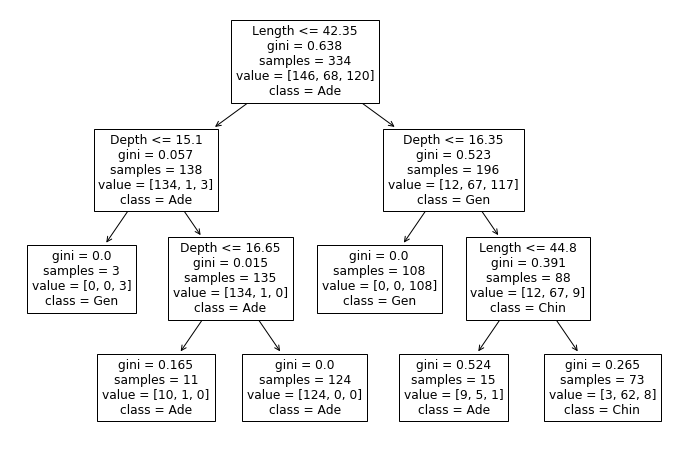

In [45]:
plt.figure(figsize=(12, 8))
t = plot_tree(m, feature_names=['Length', 'Depth'], class_names=['Ade', 'Chin', 'Gen'])  # creates a matplotlib figure